In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [18]:
from pathlib import Path
data_dir = Path('/Users/sanamjankurban/Documents/Jupyter_projects/Data Analysis Examples/DataBases')

import os
os.listdir(data_dir)

['-disbtribution-worldwide-2020-03-22.csv',
 'dataset.xlsx',
 '-disbtribution-worldwide-2020-03-20.csv',
 '-Investment-Tracker-2019-Fall-FINAL.csv',
 '.DS_Store',
 'nesarc_pds.csv',
 '-disbtribution-worldwide-2020-03-31.csv',
 'TÜRKİYE son veriler.xlsx',
 'addhealth_pds.csv',
 'Classified Data',
 'FuelConsumptionCo2.csv',
 'COVID-19-geographic-disbtribution-worldwide-2020-03-31.xlsx',
 'tree_addhealth.csv',
 'China-Global-Investment-Tracker-2019-Fall-FINAL.xlsx',
 'marscrater_pds.csv',
 'covid19-global-forecasting-week-1.zip',
 'csvfile.csv',
 'covid19-global-forecasting-week-1',
 'ool_pds.csv',
 'china_gdp.csv',
 'dataset.csv',
 'gapminder.csv']

In [19]:
df = pd.read_csv(data_dir/"Classified Data", index_col=0)
df.head(10)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
5,0.833928,1.523302,1.104743,1.021139,1.107377,1.010930,1.279538,1.280677,0.510350,1.528044,0
6,0.944705,1.251761,1.074885,0.286473,0.996440,0.428860,0.910805,0.755305,1.111800,1.110842,0
7,0.816174,1.088392,0.895343,0.243860,0.943123,1.045131,1.146536,1.341886,1.225324,1.425784,0
8,0.776551,1.463812,0.783825,0.337278,0.742215,1.072756,0.880300,1.312951,1.118165,1.225922,0
9,0.772280,0.515111,0.891596,0.940862,1.430568,0.885876,1.205231,0.596858,1.542580,0.981879,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


## Data Visualization 

In [21]:
# describtion in data set
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [26]:
lists = list(df.columns)
lists[0:len(lists)-1]

['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ']

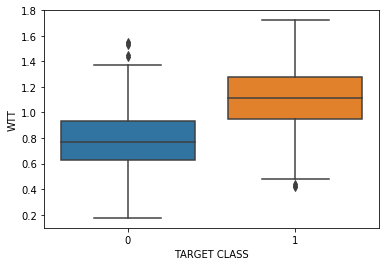

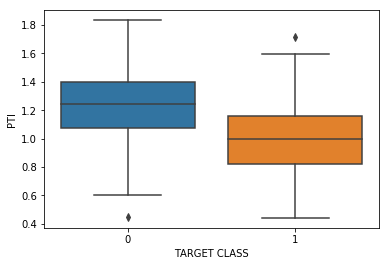

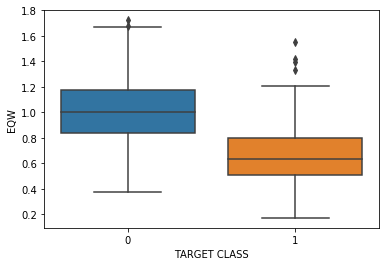

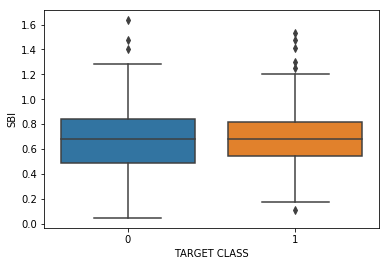

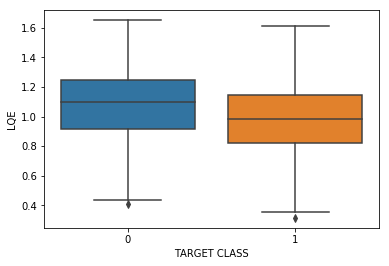

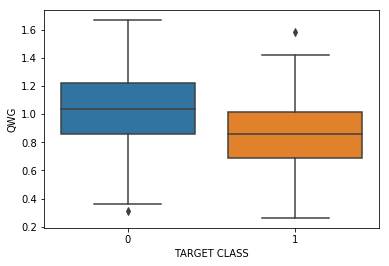

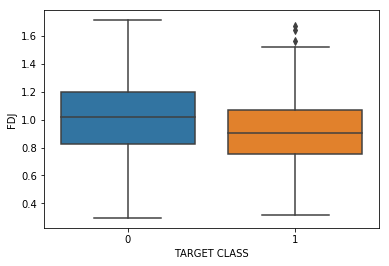

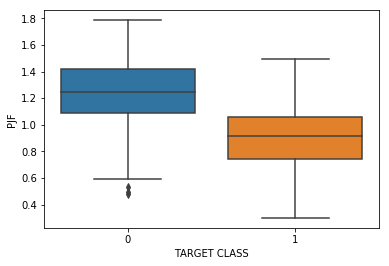

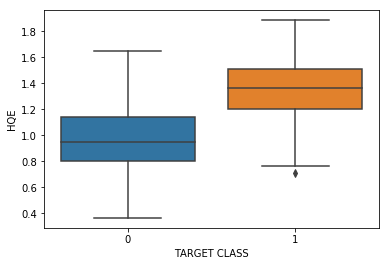

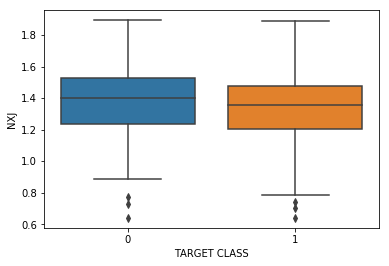

<Figure size 432x288 with 0 Axes>

In [27]:
for i in range(len(lists)-1):
    sns.boxplot(x="TARGET CLASS", y=lists[i], data=df)
    plt.figure()

In [29]:
# Instantiate a scaler standardizing estimator
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
# fit the features data to only this estimator (drop the "TARGET CLASS" column) and transform
scaler.fit(df.drop('TARGET CLASS', axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [32]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Test/Train data split, Create a model and Prediction

In [33]:
from sklearn.model_selection import train_test_split
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['TARGET CLASS'], test_size=0.50, 
                                                    random_state=101)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [35]:
prediction = knn.predict(X_test)

#### Evaluation and Classification Quality  

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
conf_mat = confusion_matrix(y_test, prediction)
print(conf_mat)

[[233  17]
 [ 24 226]]


In [38]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       250
           1       0.93      0.90      0.92       250

   micro avg       0.92      0.92      0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



In [43]:
print("Misclassification Error Rate: ", round(np.mean(prediction!=y_test), 3))

Misclassification Error Rate:  0.082


#### Choising "K" by elbow methods

In [40]:
error_rate = []

for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    prediction_i = knn.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test))

Text(0, 0.5, 'Error (Misclassification) Rate')

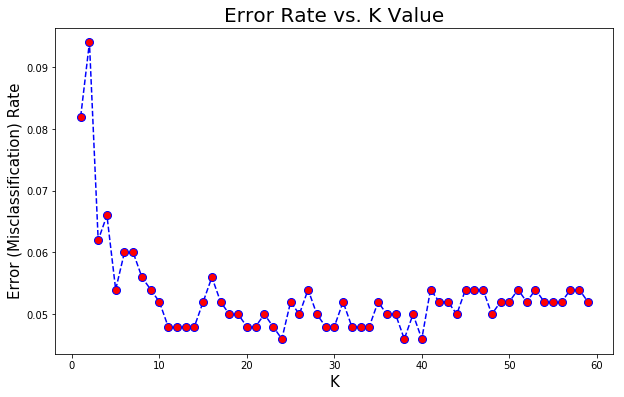

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,60), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('Error (Misclassification) Rate',fontsize=15)